####  Análisis de Iris con Árboles de Decisión 

**Nombre**: Brayan Olivares  

#### 1. Importación de Librerías 

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn para modelado
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix,classification_report)
from sklearn.inspection import permutation_importance

# Configuración de visualización
try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn')
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

#### 2. Carga y Exploración de Datos

##### Cargamos el dataset Iris directamente desde sklearn.datasets. Este dataset contiene medidas morfológicas de tres especies de flores Iris.


In [48]:
# Cargar dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Mostrar información básica
print("=== Estructura del dataset ===")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n=== Tipos de datos ===")
print(df.dtypes)
print("\n=== Estadísticas descriptivas ===")
print(df.describe())
print("\n=== Distribución de especies ===")
print(df['species'].value_counts())

=== Estructura del dataset ===
Filas: 150, Columnas: 5

=== Tipos de datos ===
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

=== Estadísticas descriptivas ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%        

#### 3. EDA para Iris

##### Realizamos visualizaciones para entender: 
##### 1. Distribución de cada característica 
##### 2. Relaciones entre características 
##### 3. Diferencias entre especies

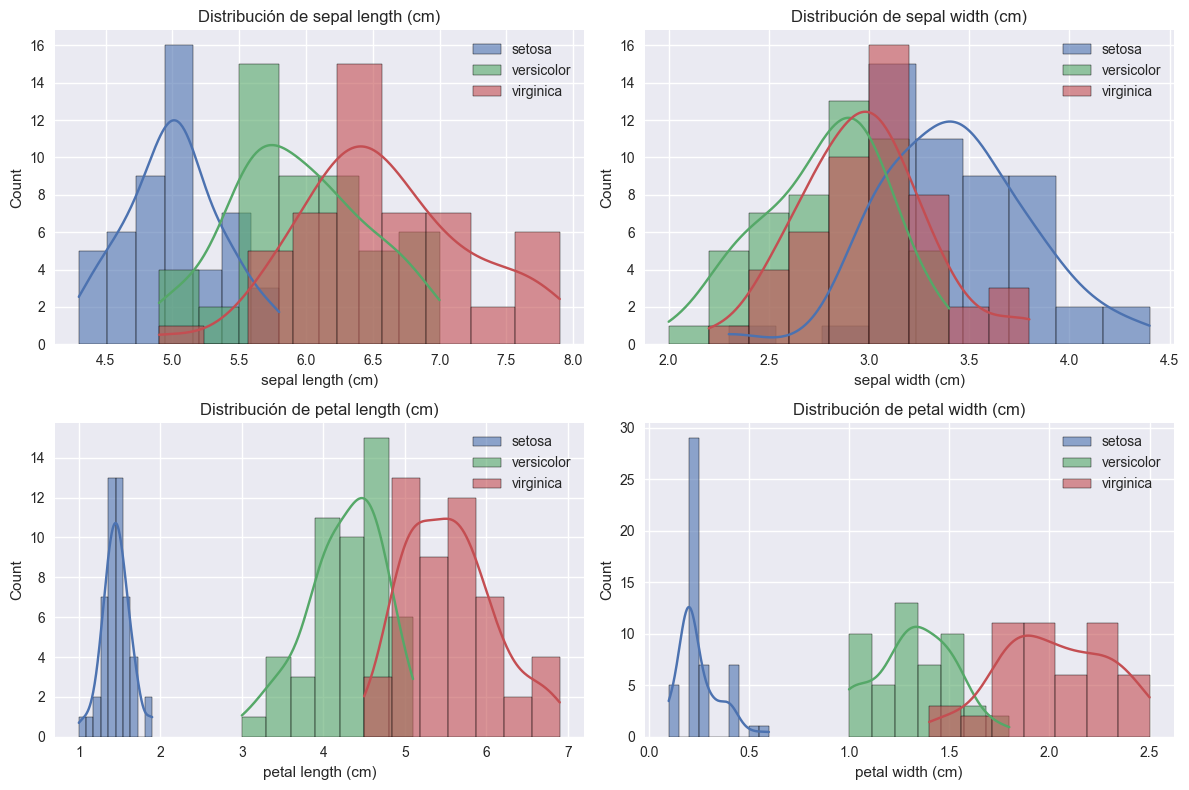

In [49]:
# Histogramas por especie
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for ax, feature in zip(axes.ravel(), iris.feature_names):
    for species in iris.target_names:
        sns.histplot(df[df['species']==species][feature], 
                     ax=ax, label=species, alpha=0.6, kde=True)
    ax.set_title(f'Distribución de {feature}')
    ax.legend()
plt.tight_layout()
plt.show()

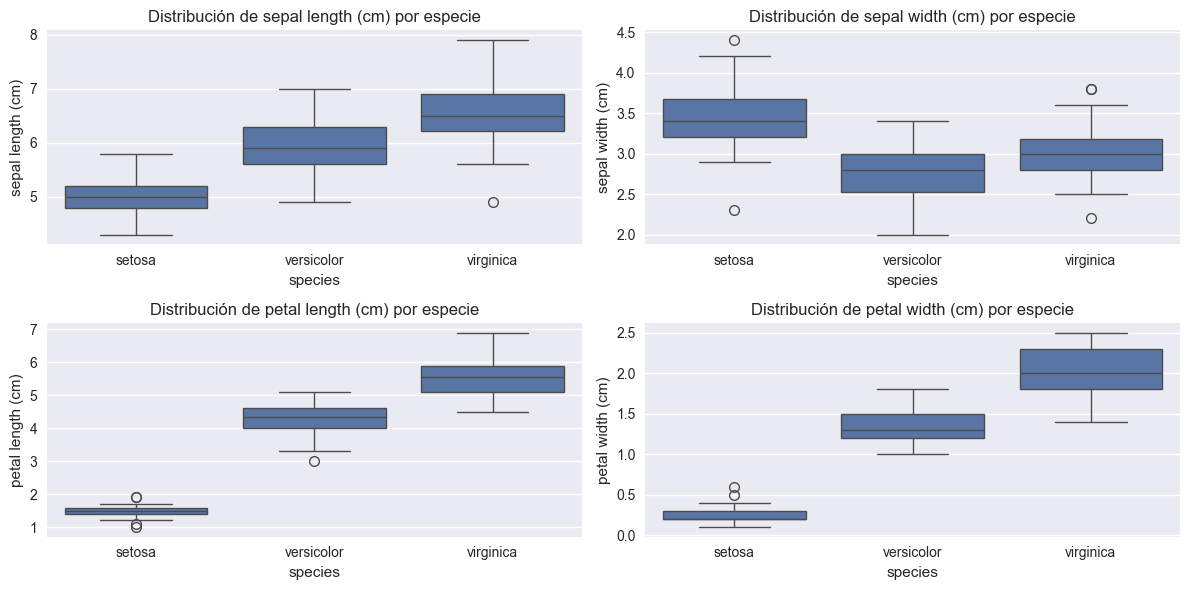

In [50]:
# Boxplots comparativos
plt.figure(figsize=(12, 6))
for i, feature in enumerate(iris.feature_names):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Distribución de {feature} por especie')
plt.tight_layout()
plt.show()

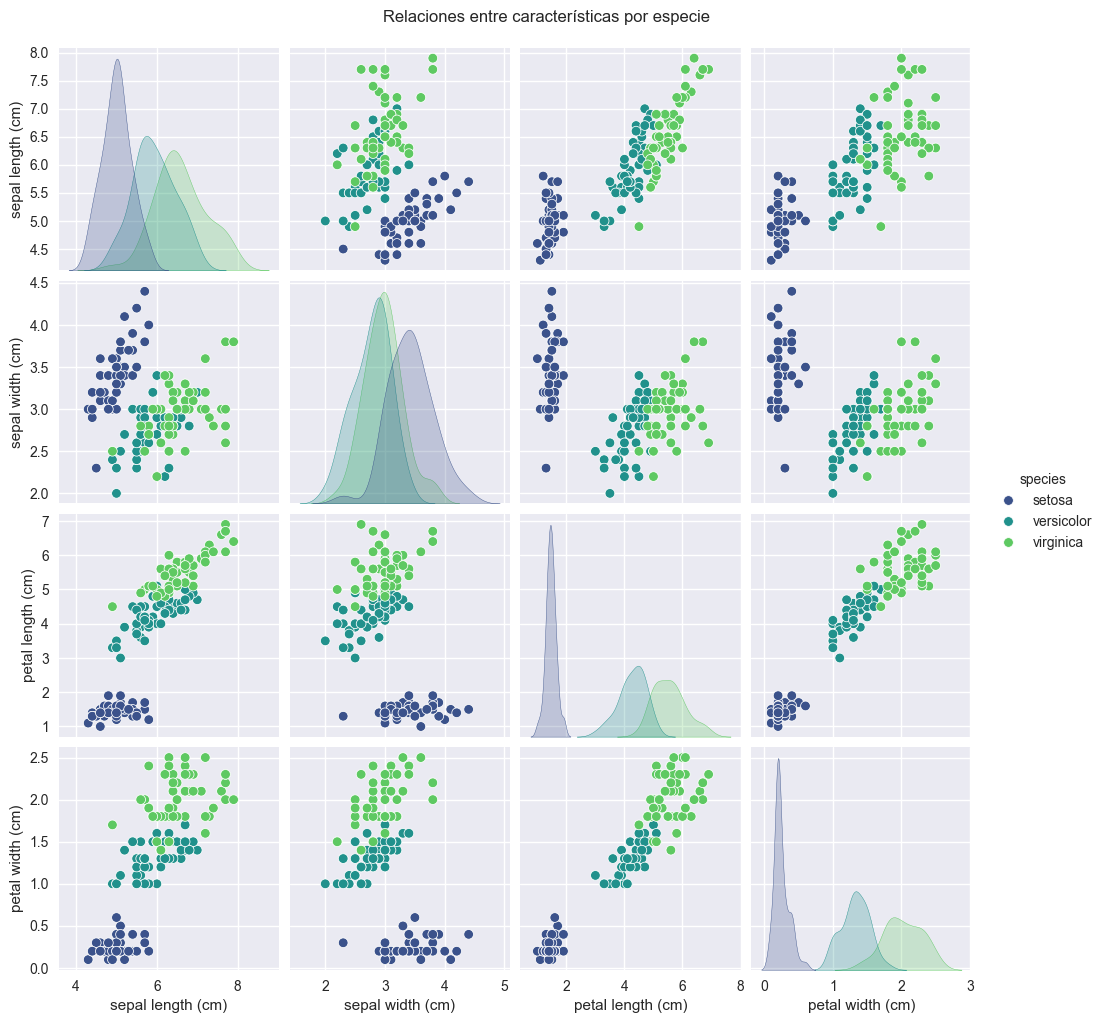

In [51]:
# Pairplot para ver relaciones entre variables
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Relaciones entre características por especie', y=1.02)
plt.show()

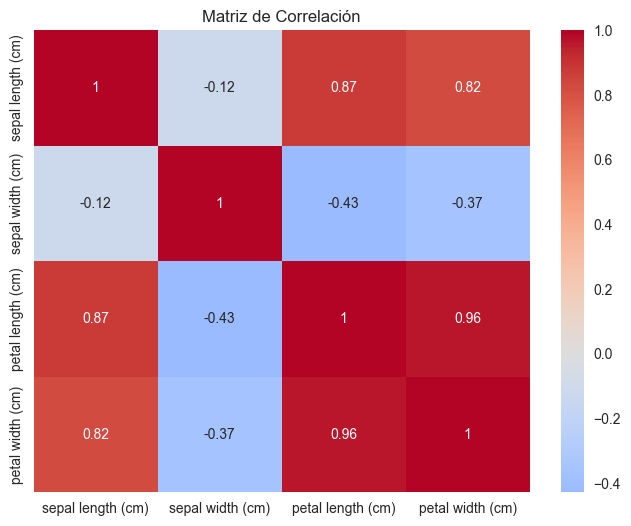

In [52]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
corr_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

#### 4. Preprocesamiento

Preparamos los datos para el modelado:
1. Separamos características y variable objetivo
2. Codificamos la variable categórica
3. Dividimos en conjuntos de entrenamiento y prueba

In [53]:
# Codificación de la variable objetivo
df['species_encoded'] = iris.target

# Separación de features y target
X = df[iris.feature_names]
y = df['species_encoded']

# División train-test (70-30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42,
    stratify=y  # Mantener proporción de clases
)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]}")
print("\nDistribución en entrenamiento:")
print(y_train.value_counts(normalize=True))
print("\nDistribución en prueba:")
print(y_test.value_counts(normalize=True))

Tamaño del conjunto de entrenamiento: 105
Tamaño del conjunto de prueba: 45

Distribución en entrenamiento:
species_encoded
1    0.333333
0    0.333333
2    0.333333
Name: proportion, dtype: float64

Distribución en prueba:
species_encoded
2    0.333333
1    0.333333
0    0.333333
Name: proportion, dtype: float64


#### 5. Modelado

Creamos un modelo base sin ajuste de parámetros para establecer una línea base.

In [54]:
# Crear y entrenar el modelo
dtree = DecisionTreeClassifier(
    max_depth=3,  # Limitamos la profundidad para mejor visualización
    random_state=42
)
dtree.fit(X_train, y_train)

# Predecir en test
y_pred = dtree.predict(X_test)

In [55]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy: 0.9777777777777777

Matriz de Confusión:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



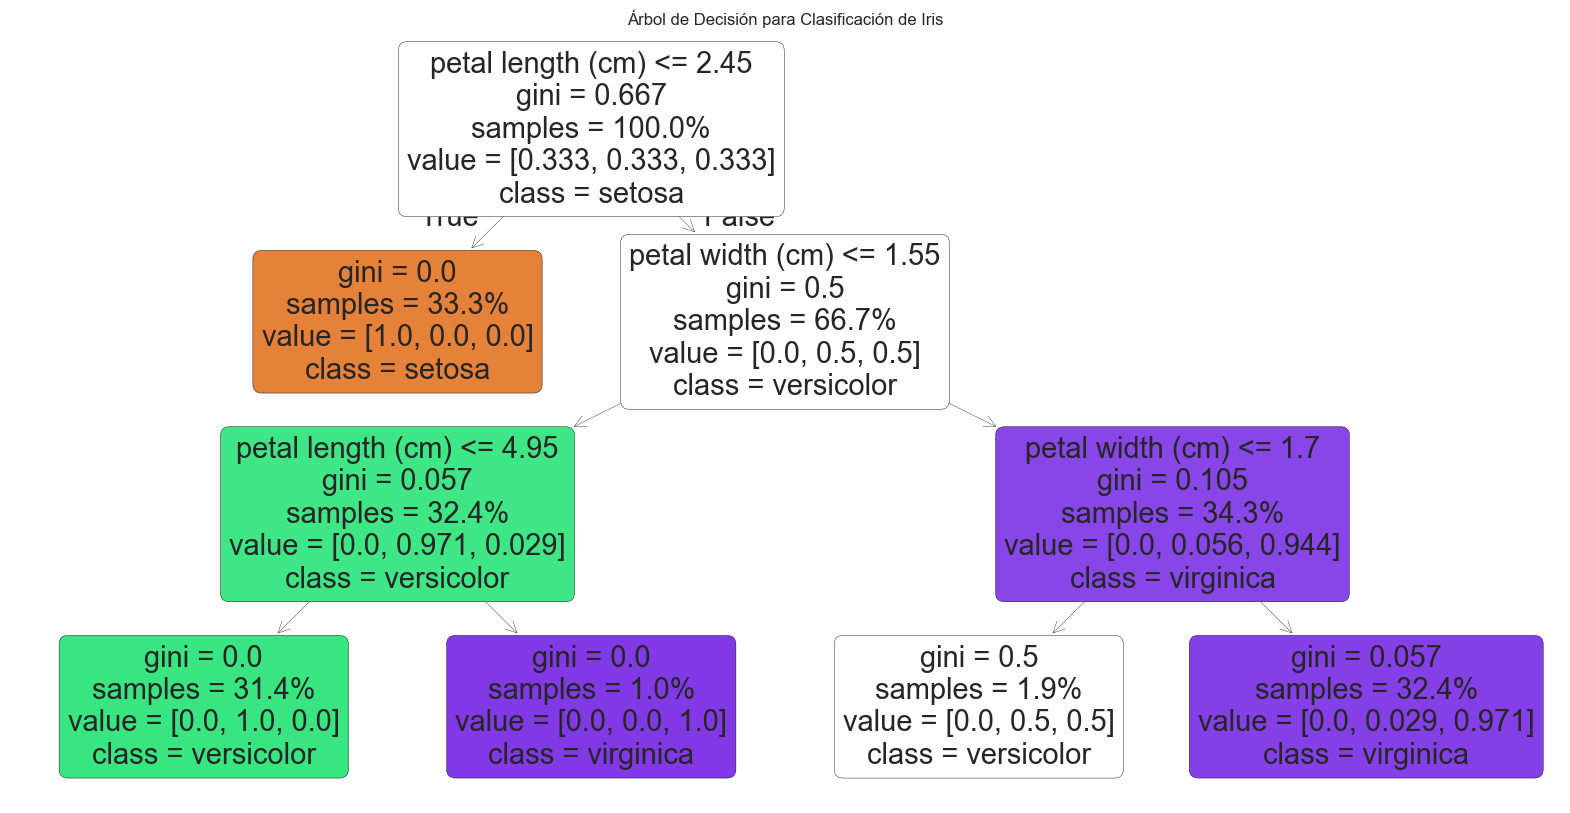

In [56]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(
    dtree, 
    feature_names=X.columns, 
    class_names=le.classes_, 
    filled=True,
    rounded=True,
    proportion=True
)
plt.title("Árbol de Decisión para Clasificación de Iris")
plt.show()

#### 6. Modelado: Árbol de Decisiones con ajuste de hiperparámetros

Optimizamos los hiperparámetros usando GridSearchCV para encontrar la mejor combinación

In [57]:
# Definición de parámetros para búsqueda
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


In [58]:
# Búsqueda de mejores parámetros
dt_tuned = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
dt_tuned.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [59]:
# Resultados
print("Mejores parámetros encontrados:")
print(dt_tuned.best_params_)
print(f"\nMejor accuracy en validación cruzada: {dt_tuned.best_score_:.4f}")

Mejores parámetros encontrados:
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Mejor accuracy en validación cruzada: 0.9524


In [60]:
# Evaluación en conjunto de prueba
y_pred_tuned = dt_tuned.predict(X_test)
print("\n=== Métricas del modelo ajustado ===")
print(f"Accuracy en prueba: {accuracy_score(y_test, y_pred_tuned):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_tuned, target_names=iris.target_names))


=== Métricas del modelo ajustado ===
Accuracy en prueba: 0.9778

Reporte de clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



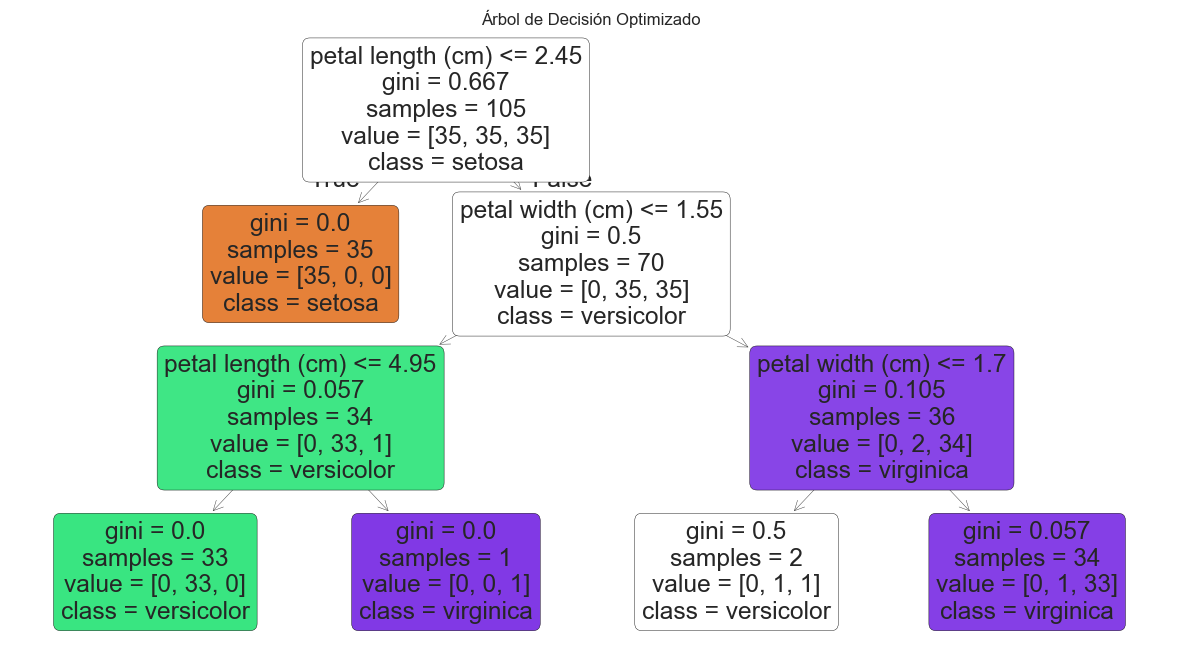

In [61]:
# Visualización del árbol optimizado
plt.figure(figsize=(15, 8))
plot_tree(dt_tuned.best_estimator_, 
          feature_names=iris.feature_names, 
          class_names=iris.target_names, 
          filled=True, 
          rounded=True)
plt.title("Árbol de Decisión Optimizado")
plt.show()

#### 7. Análisis de Importancia de Características

Evaluamos la importancia de cada característica usando dos métodos:
1. Importancia basada en el árbol (Gini)
2. Importancia por permutación (más robusta)

In [62]:
# Importancia basada en el árbol
importance_base = dt_base.feature_importances_
importance_tuned = dt_tuned.best_estimator_.feature_importances_

importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance_Base': importance_base,
    'Importance_Tuned': importance_tuned
}).sort_values('Importance_Tuned', ascending=False)

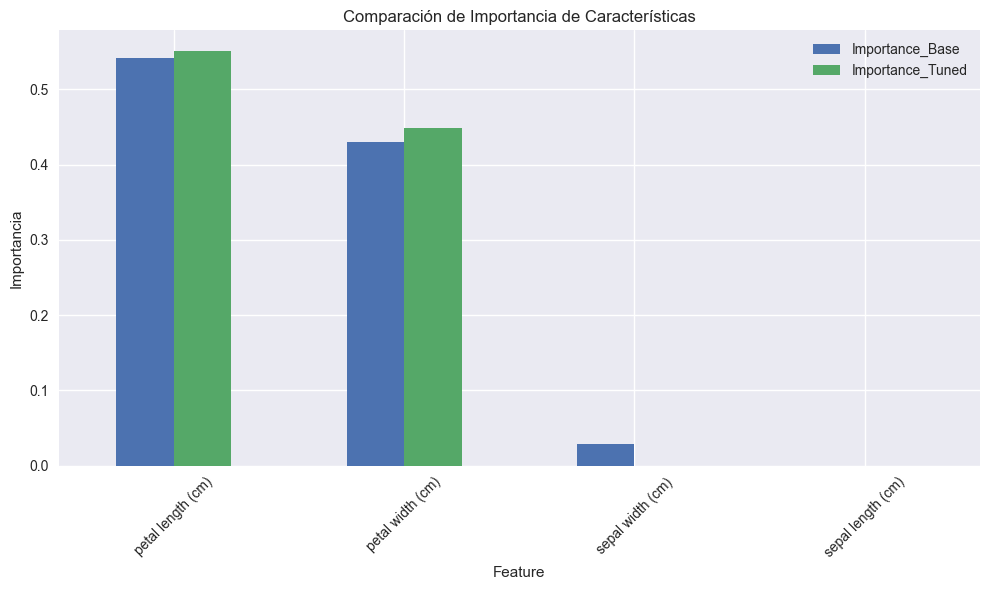

In [63]:
# Visualización comparativa
importance_df.plot(x='Feature', y=['Importance_Base', 'Importance_Tuned'], 
                  kind='bar', figsize=(10, 6))
plt.title('Comparación de Importancia de Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [64]:
# Importancia por permutación
perm_importance = permutation_importance(
    dt_tuned.best_estimator_,
    X_test,
    y_test,
    n_repeats=30,
    random_state=42,
    n_jobs=-1
)

perm_importance_df = pd.DataFrame({
    'Feature': iris.feature_names,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values('Importance', ascending=False)

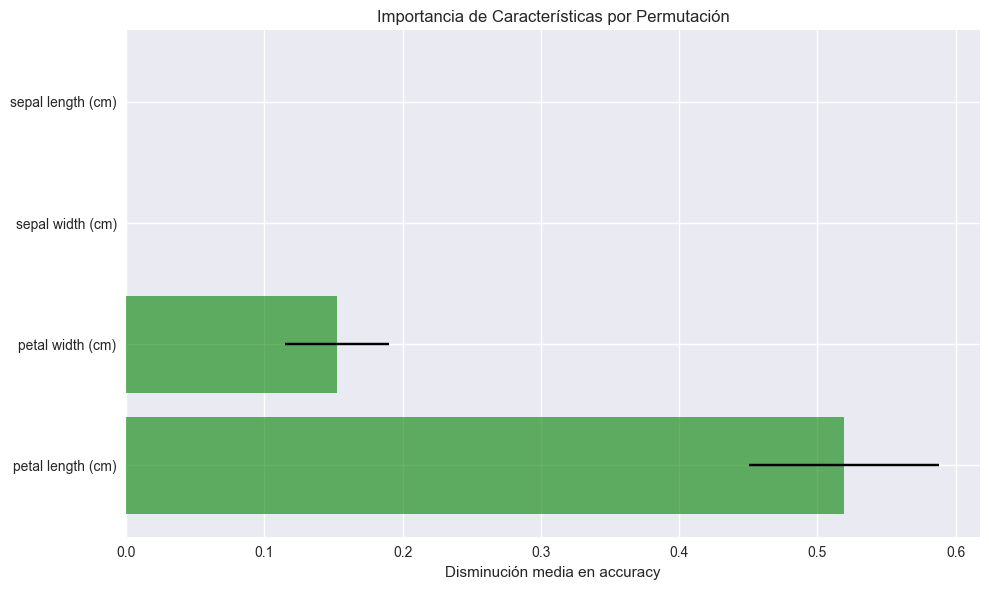

In [65]:
# Visualización
plt.figure(figsize=(10, 6))
plt.barh(perm_importance_df['Feature'], perm_importance_df['Importance'], 
         xerr=perm_importance_df['Std'], color='green', alpha=0.6)
plt.title('Importancia de Características por Permutación')
plt.xlabel('Disminución media en accuracy')
plt.tight_layout()
plt.show()

#### 8. Conclusiones y Comparación de Modelos

Resumen de resultados y comparación entre el modelo base y el optimizado.

In [66]:
# Comparación final
results = pd.DataFrame({
    'Modelo': ['Base', 'Optimizado'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_base),
        accuracy_score(y_test, y_pred_tuned)
    ],
    'Profundidad': [
        dt_base.get_depth(),
        dt_tuned.best_estimator_.get_depth()
    ],
    'Nodos': [
        dt_base.tree_.node_count,
        dt_tuned.best_estimator_.tree_.node_count
    ]
})

print("=== Comparación de Modelos ===")
print(results)

print("\n=== Características más importantes ===")
print(perm_importance_df[['Feature', 'Importance']].head(2))

=== Comparación de Modelos ===
       Modelo  Accuracy  Profundidad  Nodos
0        Base  0.933333            5     15
1  Optimizado  0.977778            3      9

=== Características más importantes ===
             Feature  Importance
2  petal length (cm)    0.519259
3   petal width (cm)    0.152593
